In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az  #ArviZ: Exploratory analysis of Bayesian models
import matplotlib.pyplot as plt

### 5.1. Spurious association

In [2]:
df_divorce = pd.read_csv('../Data/WaffleDivorce.csv', sep=';')

In [3]:
df_divorce.head()

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage SE,Divorce,Divorce SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
0,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45
1,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00
2,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00
3,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26
4,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00


In [60]:
df_divorce.shape

(50, 15)

In [4]:
with pm.Model() as divorce_m:
    
    #priors
    alpha = pm.Normal('alpha', mu=10, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=1)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    mu = alpha + beta * df_divorce.MedianAgeMarriage
    
    #likelihood
    likelihood = pm.Normal('divoice', mu=mu, sigma=sigma, observed=df_divorce.Divorce)
    
    #inference
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains, 1 divergences: 100%|██████████| 10000/10000 [00:16<00:00, 615.51draws/s]


##### notice that az.summary() and pm.summary() are the same

In [5]:
az.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,28.159,4.293,20.313,36.455,0.091,0.064,2229.0,2229.0,2238.0,2897.0,1.0
beta,-0.709,0.165,-1.016,-0.396,0.003,0.002,2235.0,2235.0,2243.0,2933.0,1.0
sigma,1.529,0.166,1.225,1.831,0.003,0.002,2970.0,2924.0,3012.0,3114.0,1.0


In [6]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,28.159,4.293,20.313,36.455,0.091,0.064,2229.0,2229.0,2238.0,2897.0,1.0
beta,-0.709,0.165,-1.016,-0.396,0.003,0.002,2235.0,2235.0,2243.0,2933.0,1.0
sigma,1.529,0.166,1.225,1.831,0.003,0.002,2970.0,2924.0,3012.0,3114.0,1.0


##### standardize the predictors

In [37]:
df_divorce = df_divorce.assign(MedianAgeMarriage_stand = lambda x: (df_divorce.MedianAgeMarriage \
                                                     - df_divorce.MedianAgeMarriage.mean())/df_divorce.MedianAgeMarriage.std())
df_divorce = df_divorce.assign(Marriage_stand = lambda x: (df_divorce.Marriage - df_divorce.Marriage.mean())/ \
                              df_divorce.Marriage.std())

In [38]:
df_divorce.head()

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage SE,Divorce,Divorce SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860,MedianAgeMarriage_stand,Marriage_stand
0,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45,-0.606290,0.022644
1,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00,-0.686699,1.549802
2,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00,-0.204241,0.048974
3,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26,-1.410387,1.655123
4,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00,0.599857,-0.266989


In [9]:
with pm.Model() as divorce_m_std:
    
    #priors
    alpha = pm.Normal('alpha', mu=10, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=1)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    mu = alpha + beta * df_divorce.MedianAgeMarriage_stand
    
    #likelihood
    likelihood = pm.Normal('divoice', mu=mu, sigma=sigma, observed=df_divorce.Divorce)
    
    #inference
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:04<00:00, 2371.69draws/s]


In [10]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,9.686,0.215,9.285,10.080,0.002,0.002,9503.0,9503.0,9414.0,6053.0,1.0
beta,-1.036,0.215,-1.421,-0.615,0.002,0.002,9347.0,9204.0,9358.0,6526.0,1.0
sigma,1.513,0.164,1.212,1.818,0.002,0.001,8257.0,8056.0,8415.0,5797.0,1.0


In [11]:
summary = pm.summary(trace)

In [12]:
summary.loc['alpha', 'mean']

9.686

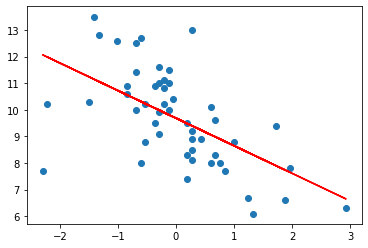

In [13]:
plt.scatter(df_divorce.MedianAgeMarriage_stand, df_divorce.Divorce)
plt.plot(df_divorce.MedianAgeMarriage_stand, summary.loc['alpha', 'mean'] \
         + summary.loc['beta', 'mean'] * df_divorce.MedianAgeMarriage_stand, color='red')

In [14]:
M_min = df_divorce.MedianAgeMarriage_stand.min()
M_max = df_divorce.MedianAgeMarriage_stand.max()

##### code 5.2

In [15]:
MedianAge_input = np.linspace(M_min, M_max, num=100)

In [16]:
posterior = pm.trace_to_dataframe(trace, chains=1) #let's just use the first chain

In [17]:
posterior.shape

(2000, 3)

In [18]:
mu_pred = np.zeros((len(MedianAge_input), posterior.shape[0]))
for i, w in enumerate(MedianAge_input):
    mu_pred[i] = posterior['alpha'] + posterior['beta'] * w   

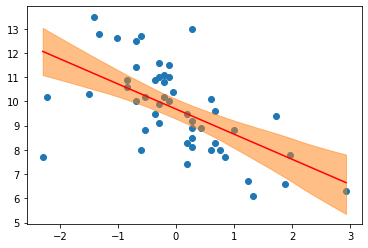

In [19]:
plt.scatter(df_divorce.MedianAgeMarriage_stand, df_divorce.Divorce)
plt.plot(MedianAge_input, summary.loc['alpha', 'mean'] \
         + summary.loc['beta', 'mean'] * MedianAge_input, color='red')
az.plot_hpd(MedianAge_input, mu_pred.T)  #notice that the 2D array mu_pred should be transposed first. 

#### 5.1.1 Multivariate notation

##### code 5.4

In [20]:
with pm.Model() as model_5_4:
    
    # prior
    alpha = pm.Normal('alpha', mu=10, sigma=10)
    beta_R = pm.Normal('beta_R', mu=0, sigma=1)
    beta_A = pm.Normal('beta_A', mu=0, sigma=1)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    mu = alpha + beta_R * df_divorce.Marriage_stand + beta_A * df_divorce.MedianAgeMarriage_stand
    
    #likelihood
    likelihood = pm.Normal('divorce', mu=mu, sigma=sigma, observed=df_divorce.Divorce)
    
    #inference
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_A, beta_R, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:04<00:00, 2012.41draws/s]


In [21]:
pm.summary(trace, credible_interval=0.89)

,mean,sd,hpd_5.5%,hpd_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,9.693,0.218,9.357,10.052,0.003,0.002,6021.0,6008.0,6047.0,5442.0,1.0
beta_R,-0.121,0.296,-0.576,0.371,0.004,0.003,4753.0,4620.0,4750.0,5545.0,1.0
beta_A,-1.120,0.296,-1.584,-0.645,0.004,0.003,4999.0,4914.0,4971.0,5643.0,1.0
sigma,1.521,0.162,1.272,1.779,0.002,0.002,5186.0,5094.0,5367.0,5583.0,1.0


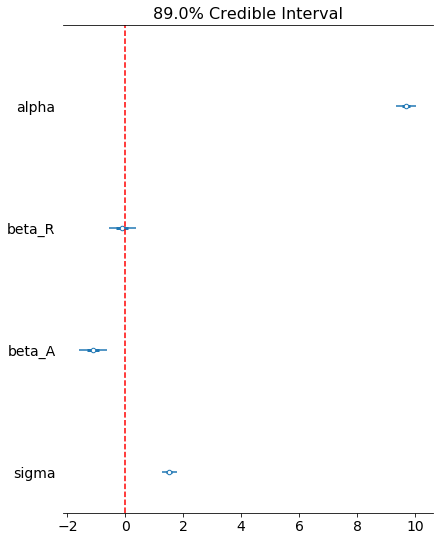

In [22]:
pm.forestplot(trace, combined=True, credible_interval=0.89)
plt.axvline(x=0, linestyle='--', c='red')
plt.show()

##### Predictor residual plots
##### code 5.6

In [40]:
with pm.Model() as model_5_6:
    
    # prior
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=1)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    mu = alpha + beta * df_divorce.MedianAgeMarriage_stand
    
    #likelihood
    likelihood = pm.Normal('marridge', mu=mu, sigma=sigma, observed=df_divorce.Marriage_stand)
    
    #inference
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:04<00:00, 2340.96draws/s]


In [41]:
pm.summary(trace, credible_interval=0.89)

,mean,sd,hpd_5.5%,hpd_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,-0.000,0.105,-0.174,0.159,0.001,0.001,8605.0,4079.0,8603.0,6028.0,1.0
beta,-0.713,0.106,-0.884,-0.546,0.001,0.001,8366.0,8219.0,8374.0,5423.0,1.0
sigma,0.719,0.078,0.597,0.836,0.001,0.001,8005.0,7883.0,8074.0,5638.0,1.0


/Users/zhengguo/.pyenv/versions/3.8.0/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/zhengguo/.pyenv/versions/3.8.0/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/zhengguo/.pyenv/versions/3.8.0/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x135ab0a30>,
      dtype=object)

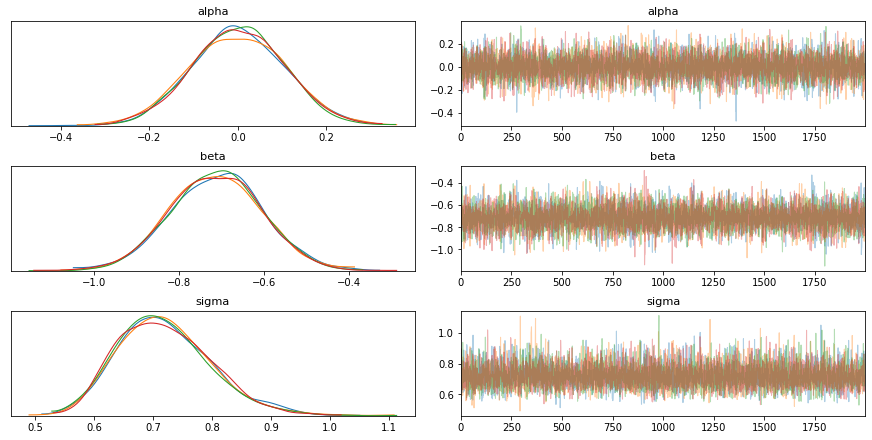

In [42]:
pm.traceplot(trace)

In [49]:
trace.stat_names

{'depth',
 'diverging',
 'energy',
 'energy_error',
 'max_energy_error',
 'mean_tree_accept',
 'model_logp',
 'step_size',
 'step_size_bar',
 'tree_size',
 'tune'}

In [51]:
with pm.Model() as model_5_6_v2:
    
    # prior
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=1)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    mu = pm.Deterministic('mu', alpha + beta * df_divorce.MedianAgeMarriage_stand) #thus, we have 'mu' for further analysis
       
    #likelihood
    likelihood = pm.Normal('marridge', mu=mu, sigma=sigma, observed=df_divorce.Marriage_stand)
    
    #inference
    trace = pm.sample(2000, tune=1000, )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:04<00:00, 2399.15draws/s]


In [53]:
trace.varnames

['alpha', 'beta', 'sigma_interval__', 'sigma', 'mu']

In [55]:
trace['mu'].shape  #notice that #obs=50.

(8000, 50)

In [61]:
marriage_mu = trace['mu'].mean(0)

In [62]:
residual = df_divorce.Marriage_stand - marriage_mu

##### code 5.8

In [65]:
inx = np.argsort(residual)

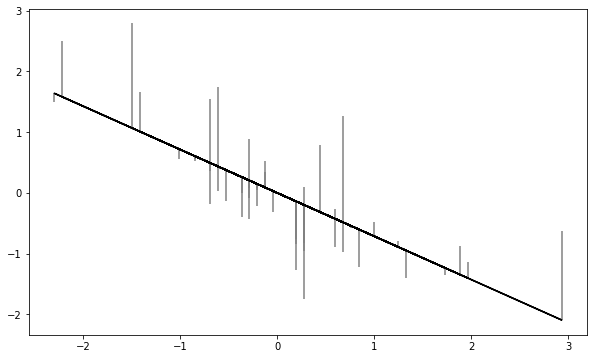

In [71]:
fig, residual_plt = plt.subplots(figsize=(10, 6))
residual_plt.plot(df_divorce.MedianAgeMarriage_stand[inx], marriage_mu[inx], 'k')
plt.vlines(df_divorce.MedianAgeMarriage_stand, marriage_mu, marriage_mu+ residual, colors='grey');

### Categorical variables
#### Binary categories
##### code 5.44

In [74]:
!pwd

/Users/zhengguo/PycharmProjects/Stats_rethinking/Rethinking/Zhen_practice


In [75]:
df = pd.read_csv('/Users/zhengguo/PycharmProjects/Stats_rethinking/Rethinking/Data/Howell1.csv', sep=';')
df.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


In [79]:
with pm.Model() as model_5_45:
    
    #prior
    alpha = pm.Normal('alpha', mu=178, sigma=100)
    beta = pm.Normal('beta', mu=0, sigma=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    
    mu = pm.Deterministic('mu', alpha + beta * df.male)
    
    #likelihood
    height = pm.Normal('height', mu=mu, sigma=sigma, observed=df.height)
    
    #inference
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:05<00:00, 1947.65draws/s]
The acceptance probability does not match the target. It is 0.8791027266813722, but should be close to 0.8. Try to increase the number of tuning steps.


In [86]:
az.summary(trace, var_names=['alpha', 'beta', 'sigma'],  credible_interval=.89)

,mean,sd,hpd_5.5%,hpd_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,134.847,1.618,132.278,137.391,0.027,0.019,3703.0,3703.0,3702.0,4647.0,1.0
beta,7.238,2.326,3.742,11.074,0.039,0.027,3638.0,3638.0,3630.0,4753.0,1.0
sigma,27.425,0.842,26.071,28.746,0.012,0.008,5094.0,5062.0,5141.0,5268.0,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x13e374e20>],
      dtype=object)

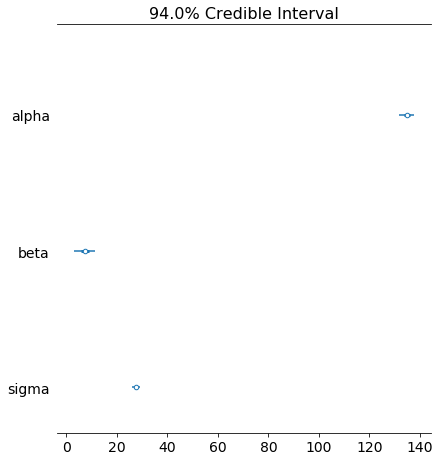

In [89]:
pm.forestplot(trace,var_names=['alpha', 'beta', 'sigma'],combined=True)